# Czyszczenie danych i przygotowanie ich do analizy

Celem zadania jest oczyszcenie zbioru TitanicMess, tak aby w przyszłości nadawał się do analizy.

Pierwszym krokiem jest zidentyfikowanie problemów z jakością danych, a następnie ich usunięcie.

Problemy z jakością danych mogą występować, jeżeli w zbiorze można odnaleźć:
- brakujące wartości,
- dane odstające - mogące zaburzyć np. proces klasyfikacji,
- niepotrzebne dane - duplikaty, powtarzające się wartości,
- niespójne dane.


Najpierw należy załadować potrzebne biblioteki oraz zbiór, który będzie oczyszczany.

### Załadowanie potrzebnych bibliotek

In [2]:
# Import python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import copy
import math
import re

### Odczyt pliku, którego separatorem jest tabulacja

In [3]:
df = pd.read_csv("TitanicMess.tsv", sep="\t")
                 #, na_values=[' ']).fillna(0)

Liczba obiektów z zbiorze i typy danych.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  892 non-null    int64 
 1   Survived     892 non-null    int64 
 2   Pclass       892 non-null    int64 
 3   Name         892 non-null    object
 4   Sex          892 non-null    object
 5   Age          719 non-null    object
 6   SibSp        892 non-null    int64 
 7   Parch        892 non-null    int64 
 8   Ticket       892 non-null    object
 9   Fare         892 non-null    object
 10  Cabin        207 non-null    object
 11  Embarked     890 non-null    object
 12  ship         892 non-null    object
dtypes: int64(5), object(8)
memory usage: 90.7+ KB


Poniższa tebela przedstawia 5 pierwszych obiektów w zbiorze.

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"7,25",NaN,S,Titanic
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,"71,2833",C85,C,Titanic
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"7,925",NaN,S,Titanic
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,"53,1",C123,S,Titanic
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,"8,05",NaN,S,Titanic


Typ kolumny Age został zidentyfikowany jako object, choć powinna ona zawierać jedynie dodatnie liczby całkowite. Może to oznaczać, że niektóre wartości przechowywane tam są wpisane błędnie. Kolumna Age zostanie zbadana w późniejszej części zadania.

## Niepotrzebne dane

Jak można zaobserwować w powyższej tabeli - wszystkie obiekty w kolumnie ship i Parch zawierają takie same wartości. 
Tak, więc istnieje podejrzenie, iż kolumny te mogą być niepotrzebne w procesie analizy. Przed usunięciem kolumn należy najpierw sprawdzić 
ile różnych wartości zawierają, aby nie usunąć takiej, która zawiera potrzebne informacje.

In [6]:
df.nunique(axis=0)

PassengerId    888
Survived         2
Pclass           3
Name           889
Sex              6
Age             93
SibSp            7
Parch            6
Ticket         680
Fare           250
Cabin          145
Embarked         6
ship             1
dtype: int64

Wartość w kolumnie ship jest taka sama dla wszystkich obiektów.

Takie dane są niepotrzebne w analizie, więc kolumna ship zostaje usunięta ze zbioru.

In [7]:
cols_to_drop = ['ship']
df = df.drop(cols_to_drop, axis=1)

Lista kolumn po usunięciu kolumny ship

In [8]:
print(df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Niepotrzebnymi danymi mogą być również zduplikowane obiekty - dwa lub więcej niczym nie różniących się obiektów (wszystkie wartości cech w obserwacjach są takie same). 


In [9]:
duplicateRowsDF = df[df.duplicated()]
print("Zduplikowane obiekty:")
duplicateRowsDF

Zduplikowane obiekty:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,11,1,3,"Sandstrom, Miss. Marguerite Ru&5$$",female,4,1,1,PP 9549,"16,7",G6,S
23,11,1,3,"Sandstrom, Miss. Marguerite Ru&5$$",female,4,1,1,PP 9549,"16,7",G6,S
520,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38,1,0,19943,90,C93,S


13 i 23 obiekt są takie same jak obiekt o identyfikatorze PassengerId równym 11. 520 obiekt jest duplikatem obiektu o PassengerId równym 225. 

W zbiorze znajduje się 891 obiektów, a kolumna PassengerId zawiera 888 różnych wartości. Najprawdopodobniej kolumna ta jest jedynie identyfikatorem. Unikatowy identyfikator może być generowany automatycznie podczas tworzenia obiektów, lecz informacje znajdujące się w innych kolumnach mogą być zduplikowane. Poniżej zostanie sprawdzone czy istnieją duplikaty obiektów nie uwzględniając kolumny PassengerId.

In [10]:
idColumn='PassengerId'
df2 = df.drop(idColumn, axis=1)
duplicateRowsDF2 = df2[df2.duplicated()]

duplicateRowsDF2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,1,3,"Sandstrom, Miss. Marguerite Ru&5$$",female,4,1,1,PP 9549,"16,7",G6,S
23,1,3,"Sandstrom, Miss. Marguerite Ru&5$$",female,4,1,1,PP 9549,"16,7",G6,S
520,1,1,"Hoyt, Mr. Frederick Maxfield",male,38,1,0,19943,90,C93,S


Obie tabele zawiarają takie same obiekty, innymi słowy nie ma znaczenia czy podczas usuwania duplikatów zostanie uwzględniony identyfikator.

In [11]:
df.drop_duplicates(keep=False,inplace=True)
print('Liczba obiektów po usunięciu duplikatów: ',len(df)-1)

Liczba obiektów po usunięciu duplikatów:  886


W wyniku usunięcia kolumny ship i zduplikowanych obiektów zbiór nie zawiera już niepotrzebnych danych.

In [12]:
column_names = df.columns
for i in column_names:
  print('{} is unique: {}'.format(i, df[i].is_unique))

PassengerId is unique: True
Survived is unique: False
Pclass is unique: False
Name is unique: True
Sex is unique: False
Age is unique: False
SibSp is unique: False
Parch is unique: False
Ticket is unique: False
Fare is unique: False
Cabin is unique: False
Embarked is unique: False


## Niespójne dane

### Kolumna Embarked

Pewne kolumny mogą posiadać listę wartości jakie mogą przechowywać. Jedną z nich jest kolumna Embarked.

Poprzez wyznaczenie wartości jakie znajdują się w kolumnie w prosty sposób można sprawdzić czy kolumna nia zawiera niespójnych danych - wartości niepożądanych.

Lista wartości jakie znajdują się w kolumnie Embarked.

In [13]:
df['Embarked'].unique().tolist()

['S', 'C', 'Q', 'So', nan, 'Co', 'Qe']

Według opisu zbioru kolumna Embarked może przyjmować jedną z trzech wartości: C, Q, S. 

W zbiorze są 4 wiersze, w których znajduje się niepoprawna wartość w kolumnie Embarked

In [14]:
listValues={'S','C','Q'}
listRowsWithoutNanInColumn= df[df['Embarked'].notna()]

listIncorrectRows=listRowsWithoutNanInColumn.loc[~df['Embarked'].isin(listValues)]
listIncorrectRows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13,NaN,So
221,222,0,2,"Bracken, Mr. James H",male,27,0,0,220367,13,NaN,So
598,599,0,3,"Boulos, Mr. Hanna",male,NaN,0,0,2664,"7,225",NaN,Co
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57,0,0,219533,"12,35",NaN,Qe


Najprostszym sposobem zlikwidowania niespójności danych w kolumnie Embarked byłoby usunięcie wierszy, w których Embarked równe jest „So”, „Co” lub „Qe”. 

W tym przypadku widać, że pierwsza litera jest poprawna, a następna została wpisana omyłkowo, dlatego wartość „So” zostaje zastąpiona wartością „S”, „Co” - „C”, a „Qe” - „Q”. Zamiana będzie możliwa, gdy błędnie wpisany ciąg tekstowy będzie zawierać „S”, „C” lub „Q”.

In [15]:
for i in range(len(listIncorrectRows)):
    embarked=listIncorrectRows.iloc[i]['Embarked']   
  
    for lv in listValues:        
        if  lv in embarked:
            df=df.replace(embarked, lv)
            listIncorrectRows=listIncorrectRows.replace(embarked, lv)

print("Tabela zawierająca obiekty po usunięciu niespójności:")
listIncorrectRows

Tabela zawierająca obiekty po usunięciu niespójności:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13,NaN,S
221,222,0,2,"Bracken, Mr. James H",male,27,0,0,220367,13,NaN,S
598,599,0,3,"Boulos, Mr. Hanna",male,NaN,0,0,2664,"7,225",NaN,C
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57,0,0,219533,"12,35",NaN,Q


Po zamianie w kolumnie Embarked znajdują się tylko puste wartości i C, Q, S.

In [16]:
print(df['Embarked'].unique().tolist())

['S', 'C', 'Q', nan]


### Kolumna Age 

Lista unikalnych wartości w kolumnie Age.

In [17]:
df['Age'].unique()

array(['22', '38', '26', '35', nan, '54', '2', '27', '14', '58', '20',
       '55', '31', '34', '15', '8', '19', '40', '.9', '66', '28', '42',
       '21', '18', '3', '7', '49', '29', '65', '28,5', '5', '11', '45',
       '4', '17', '32', '16', '25', '0,83', '30', '33', '23', '24', '46',
       '59', '71', '37', '47', '14,5', '70,5', '32,5', '12', '9', '36,5',
       '51', '55,5', '40,5', '44', '1', '61', '56', '50', '36', '45,5',
       '4435', '20,5', '62', '41', '52', '63', '23,5', '0,92', '43', '60',
       '39', '10', '64', '13', '48', '0,75', '-3', '-12', '53', '57',
       '80', '250', '70', '24,5', '6', '0,67', '30,5', '0,42', '34,5',
       '74'], dtype=object)

Tak jak wcześniej podejrzewano kolumna nie zawiera jedynie dodatnich liczb całkowitych. Dodatkowo Age równy 4435 nie jest poprawną wartością.

Kolumna zawiera oprócz poprawnych wartości: puste wartości, liczby zbyt duże, liczby rzeczywiste, których separatorem dziesiętnym jest przecinek oraz liczby poprzedzone znakiem kropki lub minusa.

In [18]:
for i in range(len(df)):
    age=df.iloc[i]['Age']
   
    try: 
        age=int(age)        
       
    except ValueError  :
        pass  
            
    else:
        if age<0:
            correctAge=age - 2*age
            df.at[i,'Age'] = correctAge                        
            

In [19]:
df['Age'].unique()

array(['22', '38', '26', '35', nan, '54', '2', '27', '14', '58', '20',
       '55', '31', '34', '15', '8', '19', '40', '.9', '66', '28', '42',
       '21', '18', '3', '7', '49', '29', '65', '28,5', '5', '11', '45',
       '4', '17', '32', '16', '25', '0,83', '30', '33', '23', '24', '46',
       '59', '71', '37', '47', '14,5', '70,5', '32,5', '12', '9', '36,5',
       '51', '55,5', '40,5', '44', '1', '61', '56', '50', '36', '45,5',
       '4435', '20,5', '62', '41', '52', '63', '23,5', '0,92', '43', '60',
       '39', '10', '64', '13', '48', '0,75', 3, '-3', 12, '-12', '53',
       '57', '80', '250', '70', '24,5', '6', '0,67', '30,5', '0,42',
       '34,5', '74'], dtype=object)

Jak widać powyżej kolumna Age nie zawiera całkowitych liczb ujemnych.

## Brakujące wartości

W zbiorze występują problemy z jakością danych, gdy można w nim odnaleźć brakujące wartości.

Poniższa heatmapa przedstawia, w których kolumnach można zaobserwować puste wartości.

<AxesSubplot:>

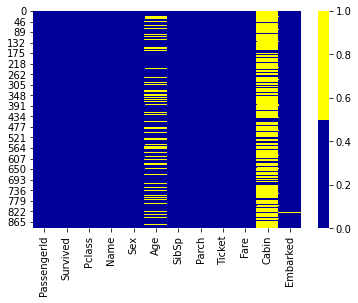

In [20]:
colours = ['#000099', '#ffff00']
sns.heatmap(df.isnull(),cmap=sns.color_palette(colours))

Puste wartości występują w kolumnie:
- Age, 
- Cabin,
- Embarked.

Poniższy kod sprawdzia jaki jest procent brakujących wartości we wszystkich kolumnnach. 
Poniższy kod przedstawia procent występowania brakujących wartości w każdej kolumnie.

In [21]:
df.isnull().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.193912
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.772266
Embarked       0.002255
dtype: float64

### Usuwanie kolumny, gdy zawiera bardzo dużą liczbę brakujących wartości

Brakujące wartości w kolumnie Cabin stanowią, aż 77,2 %. Zastępowanie tak wielu wartości może nie wpłynąć pozytywnie na np. jakość klasyfikacji, może naruszyć naturalnie występujące korelacje między zmiennymi - utworzyć sztuczne relacje. W związku z tym kolumna Cabin zostanie usunięta ze zbioru.


To czy kolumna z dużą liczbą pustych wartości zostanie usunięta zależy m.in od zbioru. 

Poniższy kod pozwala wprowadzić procent powyżej jakiego mają stanowić brakujące wartości, aby usunąć kolumnę. W chwili naciśnięcia klawisza ENTER (bez wprowadzenia liczby lub wpisując 0) zostaną usunięte domyślnie te kolumny, w których brakujące wartości stanowią ponad 70%.

In [34]:
inputPercentWhenDeleteColumn=float(input("Wprowadź procent występowania brakujących wartości, powyżej którego kolumna zostanie usunięta: "))

if inputPercentWhenDeleteColumn==0:
    inputPercentWhenDeleteColumn=0.7
else:
    inputPercentWhenDeleteColumn=inputPercentWhenDeleteColumn/100
  
cols = df.columns[df.isnull().mean()>inputPercentWhenDeleteColumn] 
df=df.drop(cols, axis=1)

Wprowadź procent występowania brakujących wartości, powyżej którego kolumna zostanie usunięta:  15


In [35]:
print("Lista kolumn po usunięciu kolumny (kolumn), w której brakujące wartości stanowią powyżej "+ str(inputPercentWhenDeleteColumn*100)+"%.")

Lista kolumn po usunięciu kolumny (kolumn), w której brakujące wartości stanowią powyżej 15.0%.


In [36]:
print(df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'SibSp' 'Parch' 'Ticket'
 'Fare' 'Embarked']


### Zastępowanie pustych wartości - przy bardzo małej liczbie brakujących wartości

W zbiorze mogą istnieć kolumny z bardzo małą liczbą brakujących wartości. W takim przypadku brakujące wartości można zastąpić wartością średnią lub medianą - dane ilościowe, a w przypadku danych jakościowych najczęściej występującą wartością w kolumnie. W zbiorze Titanic jest to kolumna Embarked. 

In [25]:
# df2 zawiera kolumny, w których można odnaleźć puste wartości
namesColWithoutNa = df.columns[~df.isnull().any()]
df2=df.drop(namesColWithoutNa, axis = 1) 

In [26]:
procMissingValuesWhenFillMeanOrFreq=0.05

namesColWithSmallNa = df2.columns[df2.isnull().mean()<procMissingValuesWhenFillMeanOrFreq]

colWithNa=df2[namesColWithSmallNa]

df_numeric = colWithNa.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("Kolumny zawierające dane ilościowe, w których puste wartości stanowią mniej niż (pomijając kolumny, które nie posiadają pustych wartości): "+ str(procMissingValuesWhenFillMeanOrFreq*100)+"%", numeric_cols)      

Kolumny zawierające dane ilościowe, w których puste wartości stanowią mniej niż (pomijając kolumny, które nie posiadają pustych wartości): 5.0% []


W zbiorze mogą istnieć kolumny z bardzo małą liczbą brakujących wartości. W takim przypadku brakujące wartości można zastąpić wartością średnią lub medianą - dane ilościowe, a w przypadku danych jakościowych najczęściej występującą wartością w kolumnie. W zbiorze Titanic jest to kolumna Embarked. 

Zastępowanie pustych wartości wartością średnią.

In [27]:
for columnName in numeric_cols:   
    mean_value=df[columnName].mean()
    df[columnName].fillna(mean_value,inplace = True)

Kolumny zawierające dane jakościowe.

In [28]:
df_non_numeric = colWithNa.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("Kolumny zawierające dane jakościowe, w których puste wartości stanowią mniej niż (pomijając kolumny, które nie posiadają pustych wartości): "+ str(procMissingValuesWhenFillMeanOrFreq*100)+"%", non_numeric_cols)

Kolumny zawierające dane jakościowe, w których puste wartości stanowią mniej niż (pomijając kolumny, które nie posiadają pustych wartości): 5.0% ['Embarked']


Zastępowanie brakujących wartości najczęściej występującą wartością w kolumnie.

In [29]:
for columnName in non_numeric_cols:
    mostFreqValue=df[columnName].value_counts().idxmax()
    df[columnName].fillna(mostFreqValue, inplace = True)

In [37]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

Ostatnią kolumną, która posiada puste wartości jest Age. Wiersze, które zawierają je są usuwane wraz z tymi w kolumnie Embarked.

## Zapisanie oczyszczonego zbioru do pliku tsv.

In [38]:
df.to_csv("TitanicCleaned.tsv", sep="\t")